# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | They changed our Flights from ...
1,Not Verified | At Copenhagen the most chaotic...
2,✅ Trip Verified | Worst experience of my life...
3,✅ Trip Verified | Due to code sharing with Ca...
4,✅ Trip Verified | LHR check in was quick at t...


In [4]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
df

,reviews
0,Not Verified | They changed our Flights from ...
1,Not Verified | At Copenhagen the most chaotic...
2,✅ Trip Verified | Worst experience of my life...
3,✅ Trip Verified | Due to code sharing with Ca...
4,✅ Trip Verified | LHR check in was quick at t...
...,...
995,✅ Trip Verified | Linate to London. The morni...
996,✅ Trip Verified | Flew British Airways from JK...
997,✅ Trip Verified | I have flown British Airways...
998,✅ Trip Verified | We can not fault the new 'Cl...


There are uncleaned data in the column reviews so we have to remove the unwanted symbols

In [6]:
df.reviews= df.reviews.str.split('|',expand=True)[1]

In [7]:
df

,reviews
0,They changed our Flights from Brussels to Lo...
1,At Copenhagen the most chaotic ticket counte...
2,Worst experience of my life trying to deal w...
3,Due to code sharing with Cathay Pacific I wa...
4,LHR check in was quick at the First Wing and...
...,...
995,Linate to London. The morning of the departu...
996,Flew British Airways from JK to London Heathr...
997,I have flown British Airways numerous times o...
998,We can not fault the new 'Club World' food an...


# Data preprocessing steps:

Cleaning the text

Tokenization

Enrichment – POS tagging

Stopwords removal

Obtaining the stem words

In [8]:
#step 1: cleaning the text

import re

# Define a function to clean the text
def clean(text):
# Removes all special characters and numericals leaving the alphabets
    text = re.sub('[^A-Za-z]+', ' ', str(text))
    return text

# Cleaning the text in the review column
df['Cleaned Reviews'] = df['reviews'].apply(clean)
df.head()

,reviews,Cleaned Reviews
0,They changed our Flights from Brussels to Lo...,They changed our Flights from Brussels to Lon...
1,At Copenhagen the most chaotic ticket counte...,At Copenhagen the most chaotic ticket counter...
2,Worst experience of my life trying to deal w...,Worst experience of my life trying to deal wi...
3,Due to code sharing with Cathay Pacific I wa...,Due to code sharing with Cathay Pacific I was...
4,LHR check in was quick at the First Wing and...,LHR check in was quick at the First Wing and ...


Step 2: Tokenization

Tokenization is the process of breaking the text into smaller pieces called Tokens. It can be performed at sentences(sentence tokenization) or word level(word tokenization).

Step 3: Enrichment – POS tagging

Parts of Speech (POS) tagging is a process of converting each token into a tuple having the form (word, tag). POS tagging essential to preserve the context of the word and is essential for Lemmatization.

Step 4: Stopwords removal

Stopwords in English are words that carry very little useful information. We need to remove them as part of text preprocessing. nltk has a list of stopwords of every language.

step 5: Obtaining stem words:
A stem is a part of a word responsible for its lexical meaning. The two popular techniques of obtaining the root/stem words are Stemming and Lemmatization.

The key difference is Stemming often gives some meaningless root words as it simply chops off some characters in the end. Lemmatization gives meaningful root words, however, it requires POS tags of the words.

NLTK is a leading platform for building Python programs to work with human language data

In [9]:
import nltk

"""This punkt tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, 
collocations, and words that start sentences. """

nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\surya\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\surya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\surya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [10]:

nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
    tags = pos_tag(word_tokenize(text))
    #print(tags)
    newlist = []
    for word, tag in tags:
        if word.lower() not in set(stopwords.words('english')):
          newlist.append(tuple([word, pos_dict.get(tag[0])]))
    return newlist 

df['POS tagged'] = df['Cleaned Reviews'].apply(token_stop_pos)
df.head()

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\surya\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\surya\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


,reviews,Cleaned Reviews,POS tagged
0,They changed our Flights from Brussels to Lo...,They changed our Flights from Brussels to Lon...,"[(changed, v), (Flights, n), (Brussels, n), (L..."
1,At Copenhagen the most chaotic ticket counte...,At Copenhagen the most chaotic ticket counter...,"[(Copenhagen, n), (chaotic, a), (ticket, n), (..."
2,Worst experience of my life trying to deal w...,Worst experience of my life trying to deal wi...,"[(Worst, n), (experience, n), (life, n), (tryi..."
3,Due to code sharing with Cathay Pacific I wa...,Due to code sharing with Cathay Pacific I was...,"[(Due, a), (code, v), (sharing, v), (Cathay, n..."
4,LHR check in was quick at the First Wing and...,LHR check in was quick at the First Wing and ...,"[(LHR, n), (check, n), (quick, a), (First, n),..."


In [11]:
df['POS tagged']

0      [(changed, v), (Flights, n), (Brussels, n), (L...
1      [(Copenhagen, n), (chaotic, a), (ticket, n), (...
2      [(Worst, n), (experience, n), (life, n), (tryi...
3      [(Due, a), (code, v), (sharing, v), (Cathay, n...
4      [(LHR, n), (check, n), (quick, a), (First, n),...
                             ...                        
995    [(Linate, n), (London, n), (morning, n), (depa...
996    [(Flew, n), (British, n), (Airways, n), (JK, n...
997    [(flown, v), (British, a), (Airways, n), (nume...
998    [(fault, v), (new, a), (Club, n), (World, n), ...
999    [(disappointing, a), (experience, n), (flew, v...
Name: POS tagged, Length: 1000, dtype: object

In [12]:
# Obtaining the stem words – Lemmatization

from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatize(pos_data):
    lemma_rew = " "
    for word, pos in pos_data:
     if not pos:
        lemma = word
        lemma_rew = lemma_rew + " " + lemma
     else:
        lemma = wordnet_lemmatizer.lemmatize(word, pos=pos)
        lemma_rew = lemma_rew + " " + lemma
    return lemma_rew

df['Lemma'] = df['POS tagged'].apply(lemmatize)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma
0,They changed our Flights from Brussels to Lo...,They changed our Flights from Brussels to Lon...,"[(changed, v), (Flights, n), (Brussels, n), (L...",change Flights Brussels London Heathrow LAX ...
1,At Copenhagen the most chaotic ticket counte...,At Copenhagen the most chaotic ticket counter...,"[(Copenhagen, n), (chaotic, a), (ticket, n), (...",Copenhagen chaotic ticket counter assignment...
2,Worst experience of my life trying to deal w...,Worst experience of my life trying to deal wi...,"[(Worst, n), (experience, n), (life, n), (tryi...",Worst experience life try deal customer serv...
3,Due to code sharing with Cathay Pacific I wa...,Due to code sharing with Cathay Pacific I was...,"[(Due, a), (code, v), (sharing, v), (Cathay, n...",Due code share Cathay Pacific downgrade BA r...
4,LHR check in was quick at the First Wing and...,LHR check in was quick at the First Wing and ...,"[(LHR, n), (check, n), (quick, a), (First, n),...",LHR check quick First Wing quickly security ...


Sentiment Analysis using VADER
VADER stands for Valence Aware Dictionary and Sentiment Reasoner.

Vader sentiment not only tells if the statement is positive or negative along with the intensity of emotion.

In [13]:
!pip install vaderSentiment

In [14]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# function to calculate vader sentiment
def vadersentimentanalysis(review):
    vs = analyzer.polarity_scores(review)
    return vs['compound']

df['Sentiment'] = df['Lemma'].apply(vadersentimentanalysis)

# function to analyse
def vader_analysis(compound):
    if compound >= 0.5:
        return 'Positive'
    elif compound < 0 :
        return 'Negative'
    else:
        return 'Neutral'
df['Analysis'] = df['Sentiment'].apply(vader_analysis)
df.head()

,reviews,Cleaned Reviews,POS tagged,Lemma,Sentiment,Analysis
0,They changed our Flights from Brussels to Lo...,They changed our Flights from Brussels to Lon...,"[(changed, v), (Flights, n), (Brussels, n), (L...",change Flights Brussels London Heathrow LAX ...,-0.7980,Negative
1,At Copenhagen the most chaotic ticket counte...,At Copenhagen the most chaotic ticket counter...,"[(Copenhagen, n), (chaotic, a), (ticket, n), (...",Copenhagen chaotic ticket counter assignment...,-0.0516,Negative
2,Worst experience of my life trying to deal w...,Worst experience of my life trying to deal wi...,"[(Worst, n), (experience, n), (life, n), (tryi...",Worst experience life try deal customer serv...,-0.9324,Negative
3,Due to code sharing with Cathay Pacific I wa...,Due to code sharing with Cathay Pacific I was...,"[(Due, a), (code, v), (sharing, v), (Cathay, n...",Due code share Cathay Pacific downgrade BA r...,-0.5369,Negative
4,LHR check in was quick at the First Wing and...,LHR check in was quick at the First Wing and ...,"[(LHR, n), (check, n), (quick, a), (First, n),...",LHR check quick First Wing quickly security ...,0.9454,Positive


In [15]:
vader_counts = df['Analysis'].value_counts()
vader_counts

Positive    523
Negative    372
Neutral     105
Name: Analysis, dtype: int64

### Visual Representation

In [16]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x1604f172340>,
 [Text(-0.07941315564527114, 1.0971296872797036, 'Positive'),
  Text(-0.2802477560251644, -1.0637016476638832, 'Negative'),
  Text(1.5137366037235516, -0.5182677826640278, 'Neutral')],
 [Text(-0.04331626671560244, 0.5984343748798382, '52.30%'),
  Text(-0.1528624123773624, -0.5802008987257544, '37.20%'),
  Text(1.0406939150599417, -0.3563091005815191, '10.50%')])

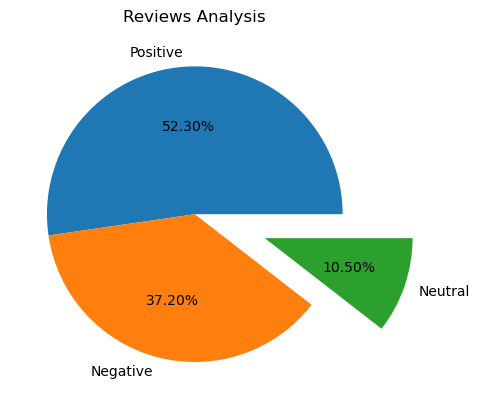

In [17]:
plt.title("Reviews Analysis")
plt.pie(vader_counts.values, labels = vader_counts.index, explode = (0, 0, 0.5), autopct='%.2f%%')

In [18]:
df.to_csv("BA_reviews.csv")

### Wordcloud
Word Cloud or Tag Clouds is a visualization technique for texts that are natively used for visualizing the tags or keywords from the websites

In [19]:
!pip install wordcloud

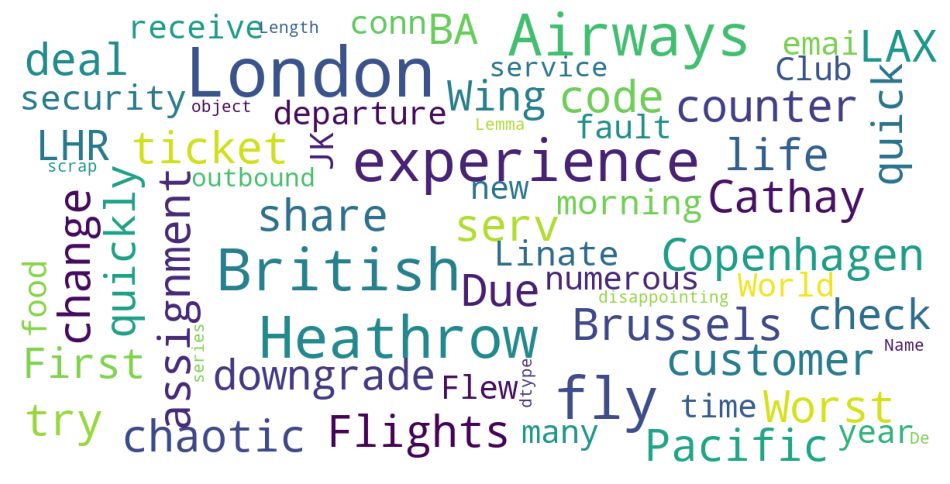

In [20]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(data))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')

    plt.imshow(wordcloud)
    plt.show()

show_wordcloud(df.Lemma)

### Task 2 - Predict customer buying behaviour

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [67]:
# preprocessing modules
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE

# modelling modules
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

# modules for model evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import precision_score,recall_score
pd.options.display.max_columns=None

In [3]:
data = pd.read_csv("customer_booking.csv",encoding='ISO-8859-1')
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


To provide more context, below is a more detailed data description, explaining exactly what each column means:

num_passengers = number of passengers travelling

sales_channel = sales channel booking was made on

trip_type = trip Type (Round Trip, One Way, Circle Trip)

purchase_lead = number of days between travel date and booking date

length_of_stay = number of days spent at destination

flight_hour = hour of flight departure

flight_day = day of week of flight departure

route = origin -> destination flight route

booking_origin = country from where booking was made

wants_extra_baggage = if the customer wanted extra baggage in the booking

wants_preferred_seat = if the customer wanted a preferred seat in the booking

wants_in_flight_meals = if the customer wanted in-flight meals in the booking

flight_duration = total duration of flight (in hours)

booking_complete = flag indicating if the customer completed the booking

In [4]:
data.shape

(50000, 14)

In [5]:
data.dtypes

num_passengers             int64
sales_channel             object
trip_type                 object
purchase_lead              int64
length_of_stay             int64
flight_hour                int64
flight_day                object
route                     object
booking_origin            object
wants_extra_baggage        int64
wants_preferred_seat       int64
wants_in_flight_meals      int64
flight_duration          float64
booking_complete           int64
dtype: object

In [6]:
data.isnull().sum()

num_passengers           0
sales_channel            0
trip_type                0
purchase_lead            0
length_of_stay           0
flight_hour              0
flight_day               0
route                    0
booking_origin           0
wants_extra_baggage      0
wants_preferred_seat     0
wants_in_flight_meals    0
flight_duration          0
booking_complete         0
dtype: int64

In [7]:
num=data.describe(include=np.number)
num

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


In [8]:
num1=num.drop(['wants_extra_baggage','wants_preferred_seat','wants_in_flight_meals'],axis=1)
num1

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,9.500000,1.000000


In [9]:
data.wants_extra_baggage=data.wants_extra_baggage.astype('object')
data.wants_preferred_seat=data.wants_preferred_seat.astype('object')
data.wants_in_flight_meals=data.wants_in_flight_meals.astype('object')

In [10]:
cat=data.describe(include='object')
cat

,sales_channel,trip_type,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals
count,50000,50000,50000,50000,50000,50000,50000,50000
unique,2,3,7,799,104,2,2,2
top,Internet,RoundTrip,Mon,AKLKUL,Australia,1,0,0
freq,44382,49497,8102,2680,17872,33439,35152,28643


In [11]:
data.head(2)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0


In [12]:
data.wants_extra_baggage.value_counts()

1    33439
0    16561
Name: wants_extra_baggage, dtype: int64

In [13]:
data.wants_preferred_seat.value_counts()

0    35152
1    14848
Name: wants_preferred_seat, dtype: int64

In [14]:
data.wants_in_flight_meals.value_counts()

0    28643
1    21357
Name: wants_in_flight_meals, dtype: int64

In [15]:
data.booking_complete.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

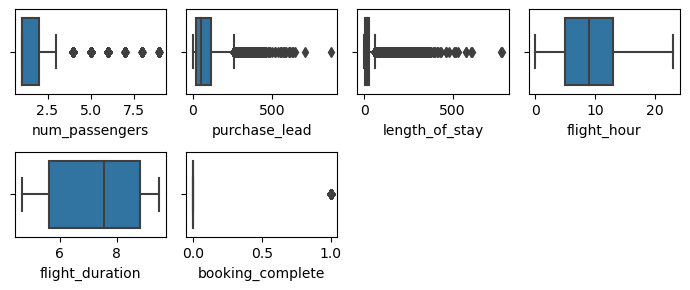

In [16]:
r=3
c=4
it=1
plt.figure(figsize=(7,4))
for i in num1.columns:
    plt.subplot(r,c,it)
    sns.boxplot(x=data[i])
    plt.xlabel(i)
    it+=1
plt.tight_layout()
plt.show()

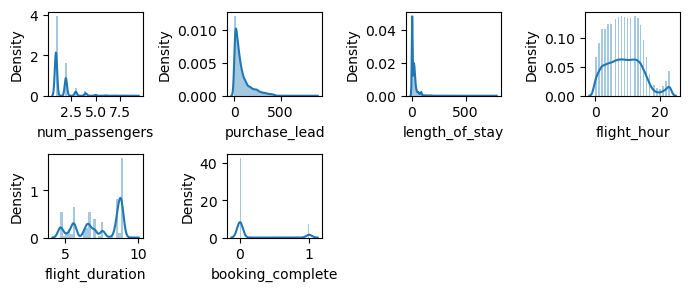

In [17]:
r=3
c=4
it=1
plt.figure(figsize=(7,4))
for i in num1.columns:
    plt.subplot(r,c,it)
    sns.distplot(x=data[i])
    plt.xlabel(i)
    it+=1
plt.tight_layout()
plt.show()

In [18]:
X= data.drop('booking_complete',axis=1)
y= data.booking_complete         

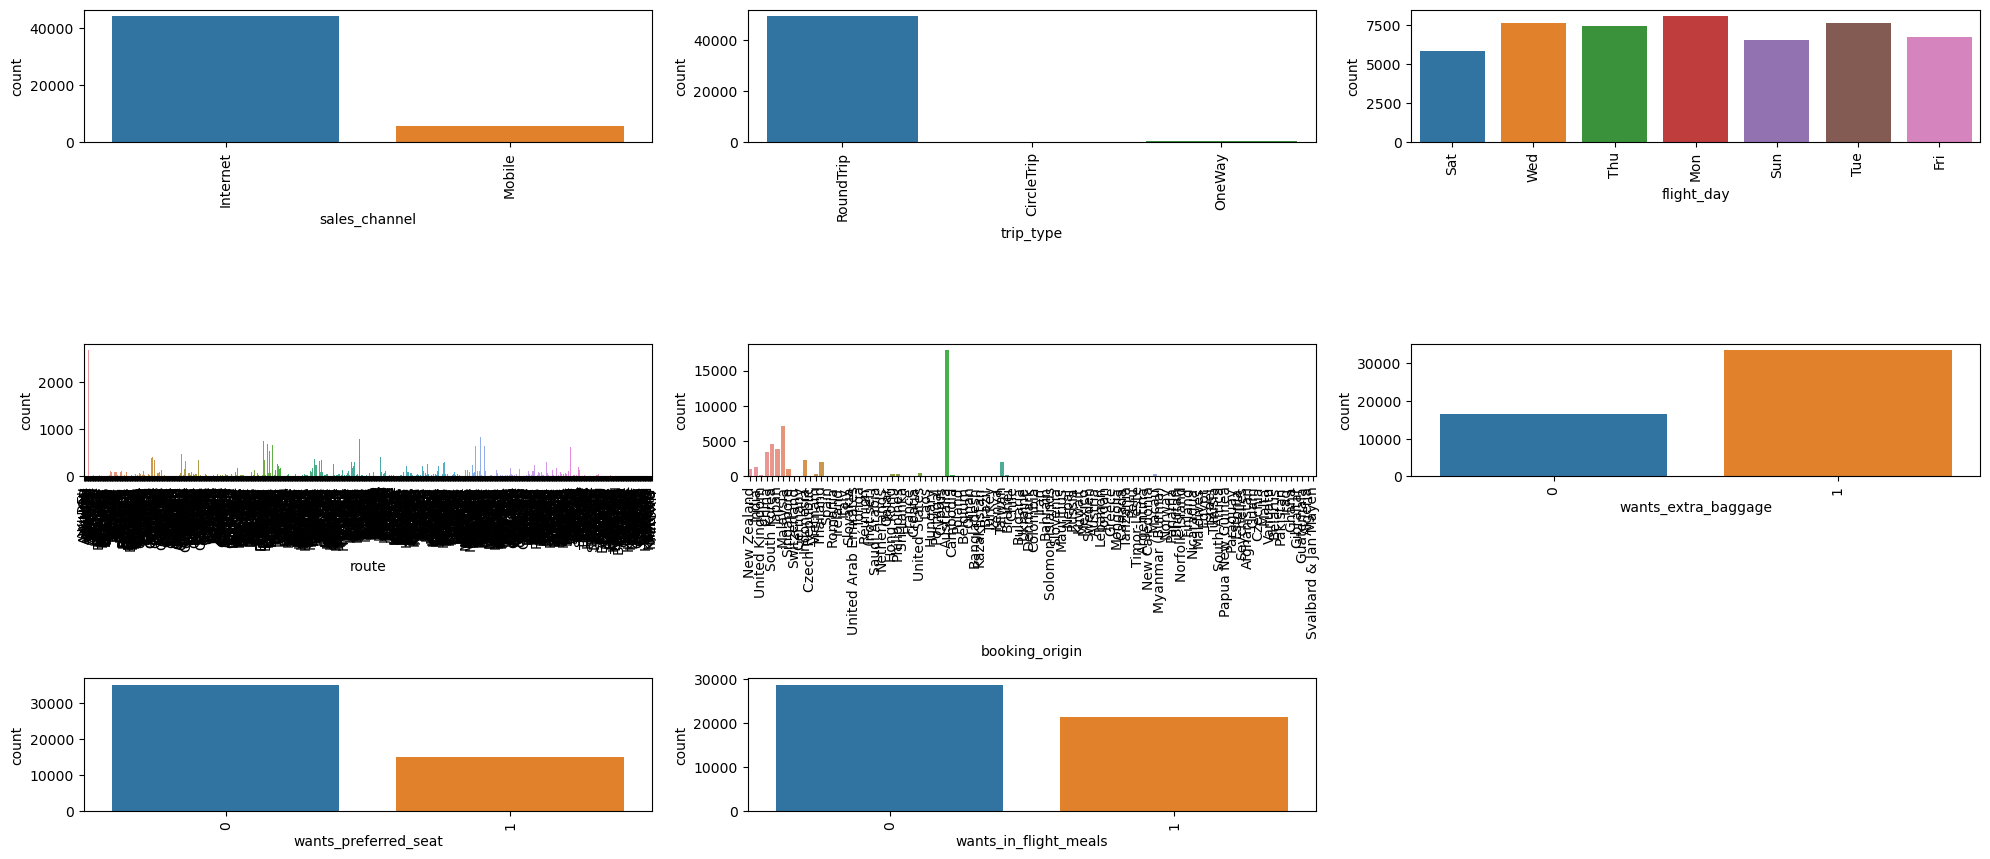

In [19]:
# Analysis of each categorical column 
r=5
c=3
it=1
plt.figure(figsize=(20,15))
for i in cat:
    plt.subplot(r,c,it)
    sns.countplot(data[i])
    plt.xticks(rotation=90)
    it+=1
plt.tight_layout()
plt.show()

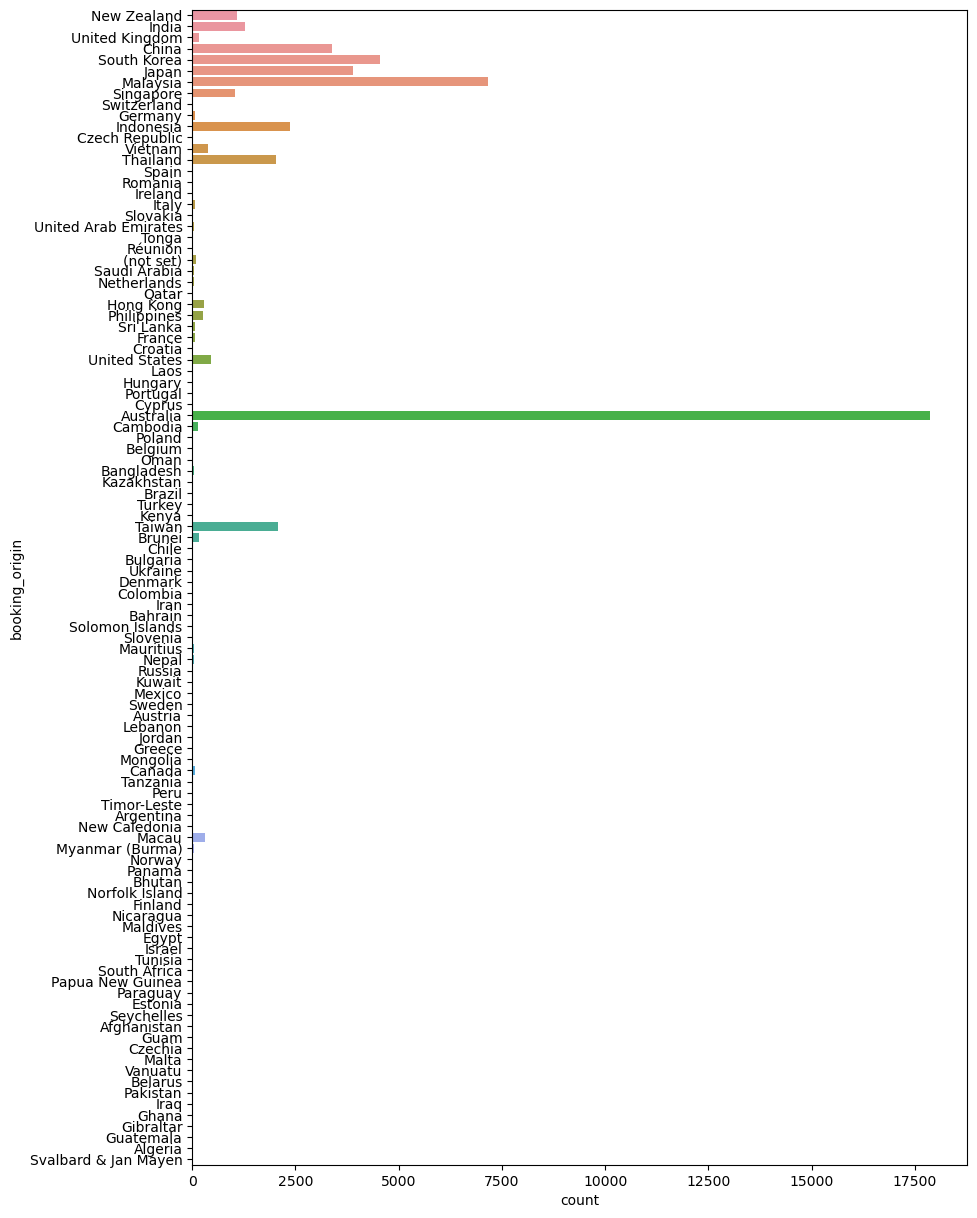

In [20]:
plt.figure(figsize=(10,15))
sns.countplot(y=data['booking_origin'])
plt.show()

In [21]:
data.route.value_counts()

AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

In [22]:
data.select_dtypes(include=np.number).skew()

num_passengers      2.690908
purchase_lead       1.653035
length_of_stay      5.274743
flight_hour         0.396623
flight_duration    -0.360080
booking_complete    1.965292
dtype: float64

The skewness of column length_of _stay and num_passengers is high so we have to transform it

In [23]:
from sklearn.preprocessing import PowerTransformer
p=PowerTransformer()
data[['length_of_stay','num_passengers','purchase_lead']]=p.fit_transform(data[['length_of_stay','num_passengers','purchase_lead']])

In [24]:
data.select_dtypes(include=np.number).skew()

num_passengers      0.603512
purchase_lead      -0.037228
length_of_stay      0.097928
flight_hour         0.396623
flight_duration    -0.360080
booking_complete    1.965292
dtype: float64

The skewness of the data has been greatly reduced

<AxesSubplot:>

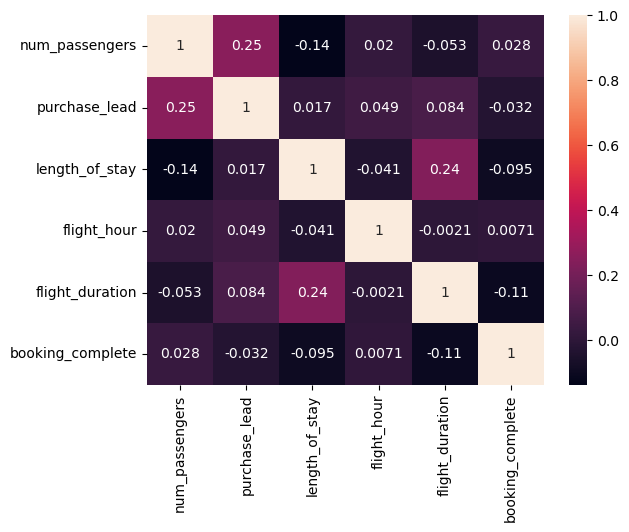

In [25]:
sns.heatmap(data.corr(),annot=True)

As we can see the correlation between the columns is low

In [26]:
from scipy import stats
for i in cat:
    if i not in ['booking_complete']:
        ct = pd.crosstab(data['booking_complete'], data[i])
        print('p_value for',i,':',round(stats.chi2_contingency(observed = ct)[1],2))

p_value for sales_channel : 0.0
p_value for trip_type : 0.0
p_value for flight_day : 0.01
p_value for route : 0.0
p_value for booking_origin : 0.0
p_value for wants_extra_baggage : 0.0
p_value for wants_preferred_seat : 0.0
p_value for wants_in_flight_meals : 0.0


the p-value is less than or equal to the chosen significance level (often 0.05), then the null hypothesis of independence is rejected and there is evidence to suggest that the two variables are not independent. In other words, there is a statistically significant relationship between the independent variable and the dependent variable.

In [27]:
data.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,1.115157,Internet,RoundTrip,1.568426,0.485166,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,-0.762055,Internet,RoundTrip,0.685122,0.530398,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,1.115157,Internet,RoundTrip,1.484711,0.613264,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,-0.762055,Internet,RoundTrip,0.538764,0.898589,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,1.115157,Internet,RoundTrip,0.225820,0.613264,15,Wed,AKLDEL,India,1,0,1,5.52,0


In [28]:
data.sales_channel.value_counts()

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

In [29]:
data.trip_type.value_counts()

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

In [30]:
data.flight_day.value_counts()

Mon    8102
Wed    7674
Tue    7673
Thu    7424
Fri    6761
Sun    6554
Sat    5812
Name: flight_day, dtype: int64

In [31]:
data.route.value_counts()

AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

In [32]:
data.booking_origin.value_counts()

Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

In [33]:
cat1=['sales_channel','trip_type','flight_day','route','booking_origin']

In [34]:
data_cat=pd.get_dummies(data=data,columns=['sales_channel','trip_type','flight_day',
                                   'route','booking_origin'],drop_first=True)

In [35]:
df=data_cat

In [36]:
df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed,route_AKLHGH,route_AKLHND,route_AKLICN,route_AKLKIX,route_AKLKTM,route_AKLKUL,route_AKLMRU,route_AKLPEK,route_AKLPVG,route_AKLTPE,route_AORICN,route_AORKIX,route_AORKTM,route_AORMEL,route_AORPER,route_AORPUS,route_BBIMEL,route_BBIOOL,route_BBIPER,route_BBISYD,route_BDOCTS,route_BDOCTU,route_BDOHGH,route_BDOICN,route_BDOIKA,route_BDOKIX,route_BDOMEL,route_BDOOOL,route_BDOPEK,route_BDOPER,route_BDOPUS,route_BDOPVG,route_BDOSYD,route_BDOTPE,route_BDOWUH,route_BDOXIY,route_BKICKG,route_BKICTS,route_BKICTU,route_BKIDEL,route_BKIHND,route_BKIICN,route_BKIKIX,route_BKIKTM,route_BKIMEL,route_BKIMRU,route_BKIOOL,route_BKIPEK,route_BKIPER,route_BKIPUS,route_BKIPVG,route_BKISYD,route_BKIXIY,route_BLRICN,route_BLRMEL,route_BLRPER,route_BLRSYD,route_BOMMEL,route_BOMOOL,route_BOMPER,route_BOMSYD,route_BTJJED,route_BTUCKG,route_BTUICN,route_BTUPER,route_BTUSYD,route_BTUWUH,route_BWNCKG,route_BWNDEL,route_BWNHGH,route_BWNIKA,route_BWNKTM,route_BWNMEL,route_BWNOOL,route_BWNPER,route_BWNSYD,route_BWNTPE,route_BWNWUH,route_CANDEL,route_CANIKA,route_CANMEL,route_CANMRU,route_CANOOL,route_CANPER,route_CANSYD,route_CCUMEL,route_CCUMRU,route_CCUOOL,route_CCUPER,route_CCUSYD,route_CCUTPE,route_CEBMEL,route_CEBOOL,route_CEBPER,route_CEBSYD,route_CGKCKG,route_CGKCTS,route_CGKCTU,route_CGKDEL,route_CGKHGH,route_CGKHND,route_CGKICN,route_CGKIKA,route_CGKJED,route_CGKKIX,route_CGKKTM,route_CGKMEL,route_CGKMRU,route_CGKOOL,route_CGKPEK,route_CGKPER,route_CGKPUS,route_CGKPVG,route_CGKSYD,route_CGKTPE,route_CGKWUH,route_CGKXIY,route_CKGCOK,route_CKGDPS,route_CKGHKT,route_CKGJHB,route_CKGKCH,route_CKGKNO,route_CKGLGK,route_CKGLOP,route_CKGMAA,route_CKGMEL,route_CKGMRU,route_CKGMYY,route_CKGOOL,route_CKGPEN,route_CKGPER,route_CKGPNH,route_CKGSBW,route_CKGSGN,route_CKGSIN,route_CKGSUB,route_CKGSYD,route_CKGTGG,route_CKGTRZ,route_CKGTWU,route_CMBCTS,route_CMBCTU,route_CMBHGH,route_CMBHND,route_CMBICN,route_CMBKIX,route_CMBMEL,route_CMBMRU,route_CMBOOL,route_CMBPEK,route_CMBPER,route_CMBPVG,route_CMBSYD,route_CMBWUH,route_CNXDEL,route_CNXHND,route_CNXICN,route_CNXKIX,route_CNXMEL,route_CNXOOL,route_CNXPEK,route_CNXPER,route_CNXPUS,route_CNXPVG,route_CNXSYD,route_CNXTPE,route_CNXXIY,route_COKCTS,route_COKCTU,route_COKHGH,route_COKICN,route_COKKIX,route_COKMEL,route_COKOOL,route_COKPER,route_COKPUS,route_COKSYD,route_COKTPE,route_COKWUH,route_CRKMEL,route_CRKOOL,route_CRKSYD,route_CSXMRU,route_CSXPER,route_CSXSYD,route_CTSDMK,route_CTSDPS,route_CTSHKT,route_CTSJHB,route_CTSJOG,route_CTSKBR,route_CTSKCH,route_CTSKNO,route_CTSLGK,route_CTSMEL,route_CTSMYY,route_CTSOOL,route_CTSPEN,route_CTSPER,route_CTSSBW,route_CTSSGN,route_CTSSIN,route_CTSSUB,route_CTSSYD,route_CTUDMK,route_CTUDPS,route_CTUHKT,route_CTUIKA,route_CTUJHB,route_CTUKBR,route_CTUKBV,route_CTUKCH,route_CTUKNO,route_CTULGK,route_CTULOP,route_CTUMAA,route_CTUMEL,route_CTUMLE,route_CTUMRU,route_CTUMYY,route_CTUOOL,route_CTUPEN,route_CTUPER,route_CTUREP,route_CTUSBW,route_CTUSGN,route_CTUSIN,route_CTUSRG,route_CTUSUB,route_CTUSYD,route_CTUTGG,route_CTUTRZ,route_CTUTWU,route_CTUURT,route_CXRMEL,route_DACHGH,route_DACHND,route_DACICN,route_DACKIX,route_DACMEL,route_DACMRU,route_DACOOL,route_DACPEK,route_DACPER,route_DACPUS,route_DACSYD,route_DACTPE,route_DADMEL,route_DADOOL,route_DADSYD,route_DELDMK,route_DELDPS,route_DELHKG,route_DELHKT,route_DELHND,route_DELJHB,route_DELJOG,route_DELKBR,route_DELKBV,route_DELKCH,route_DELKIX,route_DELKNO,route_DELLGK,route_DELMEL,route_DELMFM,route_DELMNL,route_DELMRU,route_DELMYY,route_DELOOL,route_DELPEN,route_DELPER,route_DELPNH,route_DELREP,route_DELRGN,route_DELSBW,route_DELSGN,route_DELSIN,route_DELSUB,route_DELSYD,route_DELSZX,route_DELURT,route_DMKHGH,route_DMKHND,route_D

In [37]:
df.shape

(50000, 919)

In [38]:
df.booking_complete.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

## sampling

In [39]:
# Under sampling is done when the target column data is imbalanced
d0=df[df.booking_complete==0]
d1=df[df.booking_complete!=0]
df_0=d0.sample(n=7500, random_state=2)
df_sample_under=pd.concat([df_0,d1],axis=0)

In [40]:
df_sample_under.shape

(14978, 919)

In [41]:
df_sample_under.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed,route_AKLHGH,route_AKLHND,route_AKLICN,route_AKLKIX,route_AKLKTM,route_AKLKUL,route_AKLMRU,route_AKLPEK,route_AKLPVG,route_AKLTPE,route_AORICN,route_AORKIX,route_AORKTM,route_AORMEL,route_AORPER,route_AORPUS,route_BBIMEL,route_BBIOOL,route_BBIPER,route_BBISYD,route_BDOCTS,route_BDOCTU,route_BDOHGH,route_BDOICN,route_BDOIKA,route_BDOKIX,route_BDOMEL,route_BDOOOL,route_BDOPEK,route_BDOPER,route_BDOPUS,route_BDOPVG,route_BDOSYD,route_BDOTPE,route_BDOWUH,route_BDOXIY,route_BKICKG,route_BKICTS,route_BKICTU,route_BKIDEL,route_BKIHND,route_BKIICN,route_BKIKIX,route_BKIKTM,route_BKIMEL,route_BKIMRU,route_BKIOOL,route_BKIPEK,route_BKIPER,route_BKIPUS,route_BKIPVG,route_BKISYD,route_BKIXIY,route_BLRICN,route_BLRMEL,route_BLRPER,route_BLRSYD,route_BOMMEL,route_BOMOOL,route_BOMPER,route_BOMSYD,route_BTJJED,route_BTUCKG,route_BTUICN,route_BTUPER,route_BTUSYD,route_BTUWUH,route_BWNCKG,route_BWNDEL,route_BWNHGH,route_BWNIKA,route_BWNKTM,route_BWNMEL,route_BWNOOL,route_BWNPER,route_BWNSYD,route_BWNTPE,route_BWNWUH,route_CANDEL,route_CANIKA,route_CANMEL,route_CANMRU,route_CANOOL,route_CANPER,route_CANSYD,route_CCUMEL,route_CCUMRU,route_CCUOOL,route_CCUPER,route_CCUSYD,route_CCUTPE,route_CEBMEL,route_CEBOOL,route_CEBPER,route_CEBSYD,route_CGKCKG,route_CGKCTS,route_CGKCTU,route_CGKDEL,route_CGKHGH,route_CGKHND,route_CGKICN,route_CGKIKA,route_CGKJED,route_CGKKIX,route_CGKKTM,route_CGKMEL,route_CGKMRU,route_CGKOOL,route_CGKPEK,route_CGKPER,route_CGKPUS,route_CGKPVG,route_CGKSYD,route_CGKTPE,route_CGKWUH,route_CGKXIY,route_CKGCOK,route_CKGDPS,route_CKGHKT,route_CKGJHB,route_CKGKCH,route_CKGKNO,route_CKGLGK,route_CKGLOP,route_CKGMAA,route_CKGMEL,route_CKGMRU,route_CKGMYY,route_CKGOOL,route_CKGPEN,route_CKGPER,route_CKGPNH,route_CKGSBW,route_CKGSGN,route_CKGSIN,route_CKGSUB,route_CKGSYD,route_CKGTGG,route_CKGTRZ,route_CKGTWU,route_CMBCTS,route_CMBCTU,route_CMBHGH,route_CMBHND,route_CMBICN,route_CMBKIX,route_CMBMEL,route_CMBMRU,route_CMBOOL,route_CMBPEK,route_CMBPER,route_CMBPVG,route_CMBSYD,route_CMBWUH,route_CNXDEL,route_CNXHND,route_CNXICN,route_CNXKIX,route_CNXMEL,route_CNXOOL,route_CNXPEK,route_CNXPER,route_CNXPUS,route_CNXPVG,route_CNXSYD,route_CNXTPE,route_CNXXIY,route_COKCTS,route_COKCTU,route_COKHGH,route_COKICN,route_COKKIX,route_COKMEL,route_COKOOL,route_COKPER,route_COKPUS,route_COKSYD,route_COKTPE,route_COKWUH,route_CRKMEL,route_CRKOOL,route_CRKSYD,route_CSXMRU,route_CSXPER,route_CSXSYD,route_CTSDMK,route_CTSDPS,route_CTSHKT,route_CTSJHB,route_CTSJOG,route_CTSKBR,route_CTSKCH,route_CTSKNO,route_CTSLGK,route_CTSMEL,route_CTSMYY,route_CTSOOL,route_CTSPEN,route_CTSPER,route_CTSSBW,route_CTSSGN,route_CTSSIN,route_CTSSUB,route_CTSSYD,route_CTUDMK,route_CTUDPS,route_CTUHKT,route_CTUIKA,route_CTUJHB,route_CTUKBR,route_CTUKBV,route_CTUKCH,route_CTUKNO,route_CTULGK,route_CTULOP,route_CTUMAA,route_CTUMEL,route_CTUMLE,route_CTUMRU,route_CTUMYY,route_CTUOOL,route_CTUPEN,route_CTUPER,route_CTUREP,route_CTUSBW,route_CTUSGN,route_CTUSIN,route_CTUSRG,route_CTUSUB,route_CTUSYD,route_CTUTGG,route_CTUTRZ,route_CTUTWU,route_CTUURT,route_CXRMEL,route_DACHGH,route_DACHND,route_DACICN,route_DACKIX,route_DACMEL,route_DACMRU,route_DACOOL,route_DACPEK,route_DACPER,route_DACPUS,route_DACSYD,route_DACTPE,route_DADMEL,route_DADOOL,route_DADSYD,route_DELDMK,route_DELDPS,route_DELHKG,route_DELHKT,route_DELHND,route_DELJHB,route_DELJOG,route_DELKBR,route_DELKBV,route_DELKCH,route_DELKIX,route_DELKNO,route_DELLGK,route_DELMEL,route_DELMFM,route_DELMNL,route_DELMRU,route_DELMYY,route_DELOOL,route_DELPEN,route_DELPER,route_DELPNH,route_DELREP,route_DELRGN,route_DELSBW,route_DELSGN,route_DELSIN,route_DELSUB,route_DELSYD,route_DELSZX,route_DELURT,route_DMKHGH,route_DMKHND,route_D

In [42]:
x=df_sample_under.drop(columns='booking_complete')
y=df_sample_under['booking_complete']

In [43]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(x, y)
mi_scores = pd.Series(mi_scores, name="MI Scores", index=x.columns)
mi_scores = mi_scores.sort_values(ascending=False)

mi_scores
# show a few features with their MI scores

booking_origin_Australia    0.044847
booking_origin_Malaysia     0.033477
flight_duration             0.031945
route_HKTICN                0.013261
length_of_stay              0.011267
                              ...   
route_KIXTGG                0.000000
route_CTUREP                0.000000
route_KIXSUB                0.000000
route_CTUSGN                0.000000
route_CSXSYD                0.000000
Name: MI Scores, Length: 918, dtype: float64

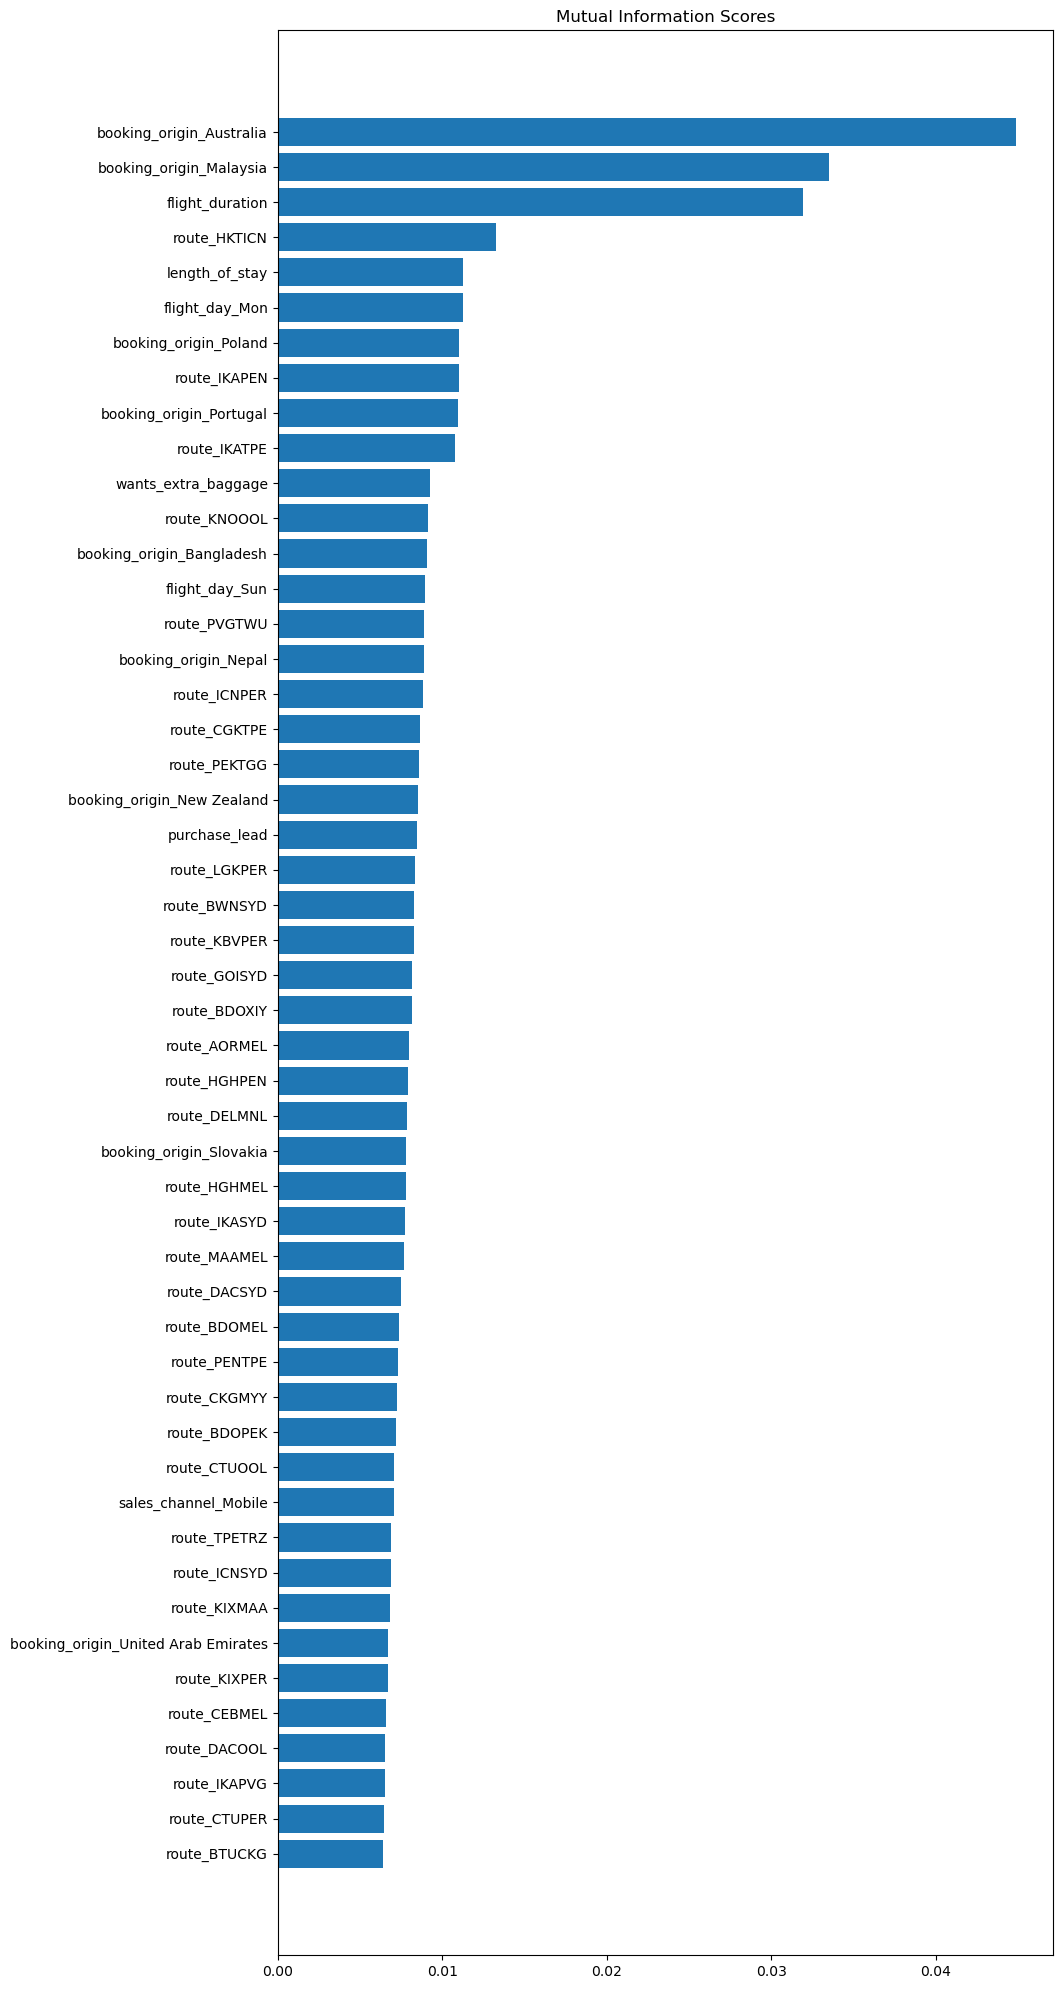

In [44]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")
plt.figure(dpi=100, figsize=(10, 25))
plot_mi_scores(mi_scores.head(50))


In [45]:
x=df_sample_under.drop(columns='booking_complete')
y=df_sample_under['booking_complete']

## Train Test Split

In [46]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=12)

In [47]:
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((10484, 918), (4494, 918), (10484,), (4494,))

In [48]:
xtrain_sc=xtrain.copy()
xtest_sc=xtest.copy()

In [49]:
from sklearn.preprocessing import StandardScaler
s=StandardScaler()
xtrain_sc[['num_passengers','purchase_lead','length_of_stay','flight_hour']]=s.fit_transform(xtrain[['num_passengers','purchase_lead','length_of_stay','flight_hour']])
xtest_sc[['num_passengers','purchase_lead','length_of_stay','flight_hour']]=s.transform(xtest[['num_passengers','purchase_lead','length_of_stay','flight_hour']])


In [50]:
xtrain_sc.describe()

num_passengers  purchase_lead  length_of_stay   flight_hour  \
count    1.048400e+04   1.048400e+04    1.048400e+04  1.048400e+04   
mean    -2.845344e-16   4.279293e-17   -3.366462e-17  2.090405e-17   
std      1.000048e+00   1.000048e+00    1.000048e+00  1.000048e+00   
min     -7.901206e-01  -2.417654e+00   -3.608079e+00 -1.702615e+00   
25%     -7.901206e-01  -6.991254e-01   -7.392297e-01 -7.620508e-01   
50%     -7.901206e-01  -2.013928e-02   -5.477542e-01 -9.599424e-03   
75%      1.069491e+00   7.090284e-01    8.772672e-01  7.428519e-01   
max      1.785132e+00   3.087569e+00    2.807680e+00  2.623980e+00   

       flight_duration  sales_channel_Mobile  trip_type_OneWay  \
count     10484.000000          10484.000000      10484.000000   
mean          7.120359              0.098245          0.006105   
std           1.520273              0.297660          0.077896   
min           4.670000              0.000000          0.000000   
25%           5.620000              0.000000          0.000000   
50%           7.000000              0.000000          0.000000   
75%           8.830000              0.000000          0.000000   
max           9.500000              1.000000          1.000000   

       trip_type_RoundTrip  flight_day_Mon  flight_day_Sat  flight_day_Sun  \
count         10484.000000    10484.000000    10484.000000    10484.000000   
mean              0.991988        0.158146        0.119229        0.125715   
std               0.089156        0.364895        0.324074        0.331544   
min               0.000000        0.000000        0.000000        0.000000   
25%               1.000000        0.000000        0.000000        0.000000   
50%               1.000000        0.000000        0.000000        0.000000   
75%               1.000000        0.000000        0.000000        0.000000   
max               1.000000        1.000000        1.000000        1.000000   

       flight_day_Thu  flight_day_Tue  flight_day_Wed  route_AKLHGH  \
count    10484.000000    10484.000000    10484.000000       10484.0   
mean         0.150610        0.151660        0.160053           0.0   
std          0.357686        0.358708        0.366673           0.0   
min          0.000000        0.000000        0.000000           0.0   
25%          0.000000        0.000000        0.000000           0.0   
50%          0.000000        0.000000        0.000000           0.0   
75%          0.000000        0.000000        0.000000           0.0   
max          1.000000        1.000000        1.000000           0.0   

       route_AKLHND  route_AKLICN  route_AKLKIX  route_AKLKTM  route_AKLKUL  \
count       10484.0  10484.000000  10484.000000  10484.000000  10484.000000   
mean            0.0      0.000858      0.000095      0.000095      0.064765   
std             0.0      0.029288      0.009766      0.009766      0.246123   
min             0.0      0.000000      0.000000      0.000000      0.000000   
25%             0.0      0.000000      0.000000      0.000000      0.000000   
50%             0.0      0.000000      0.000000      0.000000      0.000000   
75%             0.0      0.000000      0.000000      0.000000      0.000000   
max             0.0      1.000000      1.000000      1.000000      1.000000   

       route_AKLMRU  route_AKLPEK  route_AKLPVG  route_AKLTPE  route_AORICN  \
count       10484.0  10484.000000  10484.000000  10484.000000  10484.000000   
mean            0.0      0.000382      0.000095      0.000477      0.000668   
std             0.0      0.019530      0.009766      0.021834      0.025832   
min             0.0      0.000000      0.000000      0.000000      0.000000   
25%             0.0      0.000000      0.000000      0.000000      0.000000   
50%             0.0      0.000000      0.000000      0.000000      0.000000   
75%             0.0      0.000000      0.000000      0.000000      0.000000   
max             0.0      1.000000      1.000000      1.000000      1.000000   

       route_A

In [51]:
xtest_sc.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,flight_day_Mon,flight_day_Sat,flight_day_Sun,flight_day_Thu,flight_day_Tue,flight_day_Wed,route_AKLHGH,route_AKLHND,route_AKLICN,route_AKLKIX,route_AKLKTM,route_AKLKUL,route_AKLMRU,route_AKLPEK,route_AKLPVG,route_AKLTPE,route_AORICN,route_AORKIX,route_AORKTM,route_AORMEL,route_AORPER,route_AORPUS,route_BBIMEL,route_BBIOOL,route_BBIPER,route_BBISYD,route_BDOCTS,route_BDOCTU,route_BDOHGH,route_BDOICN,route_BDOIKA,route_BDOKIX,route_BDOMEL,route_BDOOOL,route_BDOPEK,route_BDOPER,route_BDOPUS,route_BDOPVG,route_BDOSYD,route_BDOTPE,route_BDOWUH,route_BDOXIY,route_BKICKG,route_BKICTS,route_BKICTU,route_BKIDEL,route_BKIHND,route_BKIICN,route_BKIKIX,route_BKIKTM,route_BKIMEL,route_BKIMRU,route_BKIOOL,route_BKIPEK,route_BKIPER,route_BKIPUS,route_BKIPVG,route_BKISYD,route_BKIXIY,route_BLRICN,route_BLRMEL,route_BLRPER,route_BLRSYD,route_BOMMEL,route_BOMOOL,route_BOMPER,route_BOMSYD,route_BTJJED,route_BTUCKG,route_BTUICN,route_BTUPER,route_BTUSYD,route_BTUWUH,route_BWNCKG,route_BWNDEL,route_BWNHGH,route_BWNIKA,route_BWNKTM,route_BWNMEL,route_BWNOOL,route_BWNPER,route_BWNSYD,route_BWNTPE,route_BWNWUH,route_CANDEL,route_CANIKA,route_CANMEL,route_CANMRU,route_CANOOL,route_CANPER,route_CANSYD,route_CCUMEL,route_CCUMRU,route_CCUOOL,route_CCUPER,route_CCUSYD,route_CCUTPE,route_CEBMEL,route_CEBOOL,route_CEBPER,route_CEBSYD,route_CGKCKG,route_CGKCTS,route_CGKCTU,route_CGKDEL,route_CGKHGH,route_CGKHND,route_CGKICN,route_CGKIKA,route_CGKJED,route_CGKKIX,route_CGKKTM,route_CGKMEL,route_CGKMRU,route_CGKOOL,route_CGKPEK,route_CGKPER,route_CGKPUS,route_CGKPVG,route_CGKSYD,route_CGKTPE,route_CGKWUH,route_CGKXIY,route_CKGCOK,route_CKGDPS,route_CKGHKT,route_CKGJHB,route_CKGKCH,route_CKGKNO,route_CKGLGK,route_CKGLOP,route_CKGMAA,route_CKGMEL,route_CKGMRU,route_CKGMYY,route_CKGOOL,route_CKGPEN,route_CKGPER,route_CKGPNH,route_CKGSBW,route_CKGSGN,route_CKGSIN,route_CKGSUB,route_CKGSYD,route_CKGTGG,route_CKGTRZ,route_CKGTWU,route_CMBCTS,route_CMBCTU,route_CMBHGH,route_CMBHND,route_CMBICN,route_CMBKIX,route_CMBMEL,route_CMBMRU,route_CMBOOL,route_CMBPEK,route_CMBPER,route_CMBPVG,route_CMBSYD,route_CMBWUH,route_CNXDEL,route_CNXHND,route_CNXICN,route_CNXKIX,route_CNXMEL,route_CNXOOL,route_CNXPEK,route_CNXPER,route_CNXPUS,route_CNXPVG,route_CNXSYD,route_CNXTPE,route_CNXXIY,route_COKCTS,route_COKCTU,route_COKHGH,route_COKICN,route_COKKIX,route_COKMEL,route_COKOOL,route_COKPER,route_COKPUS,route_COKSYD,route_COKTPE,route_COKWUH,route_CRKMEL,route_CRKOOL,route_CRKSYD,route_CSXMRU,route_CSXPER,route_CSXSYD,route_CTSDMK,route_CTSDPS,route_CTSHKT,route_CTSJHB,route_CTSJOG,route_CTSKBR,route_CTSKCH,route_CTSKNO,route_CTSLGK,route_CTSMEL,route_CTSMYY,route_CTSOOL,route_CTSPEN,route_CTSPER,route_CTSSBW,route_CTSSGN,route_CTSSIN,route_CTSSUB,route_CTSSYD,route_CTUDMK,route_CTUDPS,route_CTUHKT,route_CTUIKA,route_CTUJHB,route_CTUKBR,route_CTUKBV,route_CTUKCH,route_CTUKNO,route_CTULGK,route_CTULOP,route_CTUMAA,route_CTUMEL,route_CTUMLE,route_CTUMRU,route_CTUMYY,route_CTUOOL,route_CTUPEN,route_CTUPER,route_CTUREP,route_CTUSBW,route_CTUSGN,route_CTUSIN,route_CTUSRG,route_CTUSUB,route_CTUSYD,route_CTUTGG,route_CTUTRZ,route_CTUTWU,route_CTUURT,route_CXRMEL,route_DACHGH,route_DACHND,route_DACICN,route_DACKIX,route_DACMEL,route_DACMRU,route_DACOOL,route_DACPEK,route_DACPER,route_DACPUS,route_DACSYD,route_DACTPE,route_DADMEL,route_DADOOL,route_DADSYD,route_DELDMK,route_DELDPS,route_DELHKG,route_DELHKT,route_DELHND,route_DELJHB,route_DELJOG,route_DELKBR,route_DELKBV,route_DELKCH,route_DELKIX,route_DELKNO,route_DELLGK,route_DELMEL,route_DELMFM,route_DELMNL,route_DELMRU,route_DELMYY,route_DELOOL,route_DELPEN,route_DELPER,route_DELPNH,route_DELREP,route_DELRGN,route_DELSBW,route_DELSGN,route_DELSIN,route_DELSUB,route_DELSYD,route_DELSZX,route_DELURT,route_DMKHGH,route_DMKHND,route_DMKICN,route_DMKIKA,route_DMKKIX,route_DMKKTM,route_DMKMEL,route_DMKMRU,route_DMK

In [52]:
xtrain=xtrain_sc
xtest=xtest_sc

In [53]:
from sklearn.metrics import roc_auc_score
LGB_model=LogisticRegression(random_state=42)
LGB_model.fit(xtrain,ytrain)
ypred=LGB_model.predict(xtest)

In [54]:
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))
print(' Train score: ',LGB_model.score(xtrain,ytrain))
print('Test score: ',LGB_model.score(xtest,ytest))
print('Auc score: ',roc_auc_score(ytest, ypred))



[[1518  708]
 [ 560 1708]]
              precision    recall  f1-score   support

           0       0.73      0.68      0.71      2226
           1       0.71      0.75      0.73      2268

    accuracy                           0.72      4494
   macro avg       0.72      0.72      0.72      4494
weighted avg       0.72      0.72      0.72      4494

 Train score:  0.7401755055322397
Test score:  0.7178460169114375
Auc score:  0.7175135602808559


From the base model of the logistic regression, the precision score was 0.74.

# FEATURE ELIMINATION

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
x=df_sample_under.drop(columns='booking_complete')
y=df_sample_under.booking_complete
lr=LogisticRegression()
rfe=RFE(estimator=lr)
rfe_model=rfe.fit(x,y)
rfe_model.ranking_

array([260, 203, 124, 315,   1,   1, 137, 299,   1,   1,   1, 252, 261,
       242, 255, 319, 239, 344, 338,   1,   1, 208,  61, 142,   1, 268,
         1,   1,   1, 295,  46,   1,   1, 366,  43, 345,   1, 333, 400,
        98, 113,   1, 316,   1,  78,   1,   1, 198,   1,   1, 136,   1,
       356,   1,   1,   1,  56,   1,   1,   1,   1,   1, 398, 307, 279,
       151,   1, 230,   1,   1, 433, 170, 104, 225,   1, 141, 159,   1,
       406,   1,  60,   1, 395, 407,   1,   1, 185, 401, 216,   1, 156,
         1, 171,  91,   1,  18, 367,   1,   1,   6,   1,   1,  85, 419,
       181,   1, 258,   1,   1,   1,  63, 250,  80,   1,  92,   1,   1,
        10, 287,   1,   1,   1,   1,   1,   1,   1, 310,  45,   1,  68,
        52, 294,   1, 152,   1,   1, 384,   1,  72,   4, 202, 372,   1,
        19, 283,   7, 209, 118,   1,  75,   1,   1, 158, 306, 416,   1,
         1,   1, 346,   1,   1,   1,   1,   1,   1, 349,   1, 123,   1,
       297,   1, 399, 422, 102,   1,  89,   1,   1,  93,   1,   

In [56]:
ranking=pd.DataFrame(rfe_model.ranking_,columns=['Rank'],index=x.columns)

In [57]:
ranking[ranking['Rank']==1].T

,wants_extra_baggage,wants_preferred_seat,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,route_AKLICN,route_AKLKIX,route_AKLPEK,route_AKLTPE,route_AORICN,route_AORKIX,route_AORPER,route_AORPUS,route_BBISYD,route_BDOIKA,route_BDOMEL,route_BDOPEK,route_BDOPER,route_BDOPVG,route_BDOSYD,route_BDOWUH,route_BKICKG,route_BKICTS,route_BKICTU,route_BKIHND,route_BKIICN,route_BKIKIX,route_BKIKTM,route_BKIMEL,route_BKIPUS,route_BKISYD,route_BKIXIY,route_BOMMEL,route_BOMSYD,route_BTUCKG,route_BTUPER,route_BWNCKG,route_BWNDEL,route_BWNMEL,route_BWNPER,route_BWNWUH,route_CANMEL,route_CANMRU,route_CANPER,route_CANSYD,route_CCUPER,route_CCUTPE,route_CEBMEL,route_CEBOOL,route_CGKCTS,route_CGKDEL,route_CGKHGH,route_CGKIKA,route_CGKJED,route_CGKKIX,route_CGKKTM,route_CGKMEL,route_CGKMRU,route_CGKOOL,route_CGKPUS,route_CGKWUH,route_CKGCOK,route_CKGDPS,route_CKGJHB,route_CKGMAA,route_CKGPER,route_CKGSBW,route_CKGSGN,route_CKGTGG,route_CKGTRZ,route_CKGTWU,route_CMBCTU,route_CMBHGH,route_CMBHND,route_CMBICN,route_CMBKIX,route_CMBMEL,route_CMBOOL,route_CMBPER,route_CMBSYD,route_CNXICN,route_CNXMEL,route_CNXOOL,route_CNXPER,route_CNXPUS,route_CNXPVG,route_CNXTPE,route_COKCTU,route_COKOOL,route_COKTPE,route_COKWUH,route_CRKOOL,route_CRKSYD,route_CTSDMK,route_CTSHKT,route_CTSJHB,route_CTSKCH,route_CTSKNO,route_CTSLGK,route_CTSMYY,route_CTSOOL,route_CTSPEN,route_CTSSBW,route_CTUDMK,route_CTUIKA,route_CTUJHB,route_CTUMAA,route_CTUMEL,route_CTUMRU,route_CTUPEN,route_CTUPER,route_CTUSBW,route_CTUSGN,route_CTUSUB,route_CTUSYD,route_CTUURT,route_CXRMEL,route_DACHGH,route_DACHND,route_DACICN,route_DACKIX,route_DACMEL,route_DACOOL,route_DACPER,route_DACSYD,route_DACTPE,route_DELDMK,route_DELDPS,route_DELHKT,route_DELHND,route_DELJHB,route_DELKIX,route_DELKNO,route_DELLGK,route_DELMEL,route_DELMFM,route_DELMRU,route_DELMYY,route_DELOOL,route_DELPEN,route_DELPER,route_DELSBW,route_DELSGN,route_DELSIN,route_DELSUB,route_DELSYD,route_DELSZX,route_DELURT,route_DMKHGH,route_DMKHND,route_DMKICN,route_DMKIKA,route_DMKKTM,route_DMKOOL,route_DMKPER,route_DMKPUS,route_DMKPVG,route_DMKSYD,route_DPSKIX,route_DPSMRU,route_DPSOOL,route_DPSPUS,route_DPSSYD,route_DPSTPE,route_DPSWUH,route_DPSXIY,route_GOIKUL,route_HANOOL,route_HANPER,route_HDYKIX,route_HDYOOL,route_HDYPER,route_HDYPVG,route_HGHHKT,route_HGHJHB,route_HGHJOG,route_HGHKBR,route_HGHKCH,route_HGHKNO,route_HGHLGK,route_HGHLOP,route_HGHMEL,route_HGHMRU,route_HGHMYY,route_HGHOOL,route_HGHPEN,route_HGHSBW,route_HGHSGN,route_HGHSIN,route_HGHSUB,route_HGHTGG,route_HGHTWU,route_HKGIKA,route_HKGMEL,route_HKGMRU,route_HKGOOL,route_HKGSYD,route_HKTICN,route_HKTMEL,route_HKTPUS,route_HKTPVG,route_HKTSYD,route_HKTTPE,route_HKTXIY,route_HNDIKA,route_HNDKBR,route_HNDKCH,route_HNDKNO,route_HNDMAA,route_HNDMEL,route_HNDMLE,route_HNDPNH,route_HNDREP,route_HNDRGN,route_HNDSBW,route_HNDTRZ,route_HYDMEL,route_HYDMRU,route_HYDPER,route_ICNIKA,route_ICNJHB,route_ICNKBR,route_ICNKBV,route_ICNKCH,route_ICNLGK,route_ICNMAA,route_ICNMEL,route_ICNMLE,route_ICNMYY,route_ICNOOL,route_ICNPEN,route_ICNPER,route_ICNREP,route_ICNSDK,route_ICNSIN,route_ICNSYD,route_ICNTRZ,route_ICNVTZ,route_IKAKIX,route_IKAMEL,route_IKAMFM,route_IKAMNL,route_IKAOOL,route_IKAPEN,route_IKAPER,route_IKASIN,route_IKASUB,route_IKASYD,route_IKASZX,route_IKATPE,route_JEDJOG,route_JEDKNO,route_JEDMNL,route_JEDSUB,route_JHBKTM,route_JHBMRU,route_JHBPEK,route_JHBPUS,route_JHBSYD,route_JHBTPE,route_JOGKTM,route_JOGOOL,route_JOGPER,route_JOGPVG,route_JOGSYD,route_JOGTPE,route_KBRKIX,route_KBRMEL,route_KBRPEK,route_KBRPUS,route_KBRTPE,route_KBVMEL,route_KBVPEK,route_KBVSYD,route_KBVTPE,route_KBVXIY,route_KCHPUS,route_KCHPVG,route_KCHTPE,route_KCHXIY,route_KHHMEL,route_KHHPER,route_KHHSYD,route_KIXKNO,route_KIXLGK,route_KIXLPQ,route_KIXMAA,route_KIXMEL,route_KIXMLE,route_KIXMYY,route_KIXPEN,route_KIXPNH,route_KIXREP,route_KIXSBW,route_KIXSUB,route_KIXSYD,route_KIXTRZ,route_KIXTWU,route_KNOMEL,route_KNOPEK,route_KNOPVG,route_KNOSYD,route_KNOTPE,route_KOSSYD,route_KTMMEL,

In [58]:
list(ranking[ranking['Rank']==1].index)

['wants_extra_baggage',
 'wants_preferred_seat',
 'sales_channel_Mobile',
 'trip_type_OneWay',
 'trip_type_RoundTrip',
 'route_AKLICN',
 'route_AKLKIX',
 'route_AKLPEK',
 'route_AKLTPE',
 'route_AORICN',
 'route_AORKIX',
 'route_AORPER',
 'route_AORPUS',
 'route_BBISYD',
 'route_BDOIKA',
 'route_BDOMEL',
 'route_BDOPEK',
 'route_BDOPER',
 'route_BDOPVG',
 'route_BDOSYD',
 'route_BDOWUH',
 'route_BKICKG',
 'route_BKICTS',
 'route_BKICTU',
 'route_BKIHND',
 'route_BKIICN',
 'route_BKIKIX',
 'route_BKIKTM',
 'route_BKIMEL',
 'route_BKIPUS',
 'route_BKISYD',
 'route_BKIXIY',
 'route_BOMMEL',
 'route_BOMSYD',
 'route_BTUCKG',
 'route_BTUPER',
 'route_BWNCKG',
 'route_BWNDEL',
 'route_BWNMEL',
 'route_BWNPER',
 'route_BWNWUH',
 'route_CANMEL',
 'route_CANMRU',
 'route_CANPER',
 'route_CANSYD',
 'route_CCUPER',
 'route_CCUTPE',
 'route_CEBMEL',
 'route_CEBOOL',
 'route_CGKCTS',
 'route_CGKDEL',
 'route_CGKHGH',
 'route_CGKIKA',
 'route_CGKJED',
 'route_CGKKIX',
 'route_CGKKTM',
 'route_CGKMEL

In [59]:
x=df_sample_under[list(ranking[ranking['Rank']==1].index)]
y=df_sample_under.booking_complete

In [60]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=12)

In [61]:
LGB_model=LogisticRegression(random_state=42)
LGB_model.fit(xtrain,ytrain)
ypred=LGB_model.predict(xtest)
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))
print(' Train score: ',LGB_model.score(xtrain,ytrain))
print('Test score: ',LGB_model.score(xtest,ytest))

[[1513  713]
 [ 509 1759]]
              precision    recall  f1-score   support

           0       0.75      0.68      0.71      2226
           1       0.71      0.78      0.74      2268

    accuracy                           0.73      4494
   macro avg       0.73      0.73      0.73      4494
weighted avg       0.73      0.73      0.73      4494

 Train score:  0.7383632201449828
Test score:  0.7280818869603917


In [62]:
# function to print metrics
def print_metrics(ytest,ypred,model):
    print('Metrics for the model',model)
    print(' ')
    print("Accuracy score is ",accuracy_score(ytest,ypred))
    print(' ')
    print("recall score is ",recall_score(ytest,ypred))
    print(' ')
    print('precision score is',precision_score(ytest,ypred))
    print(' ')
    print('f1 score is', f1_score(ytest,ypred))
    print(' ')
    print(' Roc score is ',roc_auc_score(ytest,ypred))
    print(' ')
    print('Confusion matrix \n', confusion_matrix(ytest,ypred))
    print(' ')
    print('Classification report \n',classification_report(ytest,ypred))

In [64]:
#lets select the best model based on f1 score and optimize it
import time
clfs={
    'KNN': KNeighborsClassifier(),
    'NaiveBayes':GaussianNB(),
    'Logregs':LogisticRegression(),
    'DecisionTree':DecisionTreeClassifier(),
    'RandomForest':RandomForestClassifier(),
    'AdaBoost':AdaBoostClassifier(),
    'GradientBoosting':GradientBoostingClassifier()
}
models_report=pd.DataFrame(columns=['Model','accuracy','F1_score','Train score','Test score','Time_taken'])

for clf,clf_name in list(zip(clfs.values(),clfs.keys())):
    start_time = time.time()
    clf.fit(xtrain,ytrain)
    end_time = time.time()
    ypred=clf.predict(xtest)
    print('Fitting the model.....', clf_name)
    t={
        'Model':clf_name,
        'Train score':clf.score(xtrain,ytrain),
        'Test score':clf.score(xtest,ytest),
        'accuracy':accuracy_score(ytest,ypred),
        'Precision score':precision_score(ytest,ypred),
        'Recall score':recall_score(ytest,ypred),
        'F1_score':f1_score(ytest,ypred),
        'Time_taken':end_time - start_time
    }
    
    models_report=models_report.append(t,ignore_index=True)
models_report

Fitting the model..... KNN
Fitting the model..... NaiveBayes
Fitting the model..... Logregs
Fitting the model..... DecisionTree
Fitting the model..... RandomForest
Fitting the model..... AdaBoost
Fitting the model..... GradientBoosting


,Model,accuracy,F1_score,Train score,Test score,Time_taken,Precision score,Recall score
0,KNN,0.676012,0.689552,0.710511,0.676012,0.507653,0.667630,0.712963
1,NaiveBayes,0.588117,0.704926,0.588707,0.588117,0.672409,0.552060,0.974868
2,Logregs,0.728082,0.742194,0.738363,0.728082,1.890823,0.711570,0.775573
3,DecisionTree,0.694482,0.701327,0.778997,0.694482,1.045814,0.692143,0.710758
4,RandomForest,0.707610,0.718509,0.778997,0.707610,9.059511,0.698750,0.739418
5,AdaBoost,0.706943,0.731060,0.710034,0.706943,38.931964,0.680867,0.789242
6,GradientBoosting,0.708945,0.733279,0.717760,0.708945,12.150616,0.682094,0.792769


We can see from the above data Logistic regression shows better scores dhan other models

**Best Model**

In [69]:
LGB_model=LogisticRegression(random_state=42)
LGB_model.fit(xtrain,ytrain)
ypred=LGB_model.predict(xtest)
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))
print(' Train score: ',LGB_model.score(xtrain,ytrain))
print('Test score: ',LGB_model.score(xtest,ytest))
print('accuracy: ',accuracy_score(ytest,ypred))
print('Precision score:',precision_score(ytest,ypred))
print('Recall score: ',recall_score(ytest,ypred))
print('F1_score: ',f1_score(ytest,ypred))

[[1513  713]
 [ 509 1759]]
              precision    recall  f1-score   support

           0       0.75      0.68      0.71      2226
           1       0.71      0.78      0.74      2268

    accuracy                           0.73      4494
   macro avg       0.73      0.73      0.73      4494
weighted avg       0.73      0.73      0.73      4494

 Train score:  0.7383632201449828
Test score:  0.7280818869603917
accuracy:  0.7280818869603917
Precision score: 0.7115695792880259
Recall score:  0.7755731922398589
F1_score:  0.7421940928270043


**Model has been build with the logistic regression with the f1 score of 0.74**